# Ford GoBike 
## by Mariam Ahmed

## Investigation Overview

> In this data analysis project, I would like to explore the data of Ford GoBike to figure out their patterns and relations based on the the different tipes of users, user's gender, age, trips duration, and how ofte is this servise mostly used.

## Dataset Overview

> This data set includes information about individual 183411 rides made in a bike-sharing system covering the greater San Francisco Bay area in february 2019 with the following fields: 
 - Trip Duration (in seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type ("Subscriber" = Member or "Customer" = Casual)
 - Member Year of Birth
 - Member Gender


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
# Create a different copy to our original dataframe to avoid corrupting it
df_clean = df.copy()

# Set a timestamp
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [4]:
# Categorize users by their user_type (customers or subscribers), gender, and sharing.
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [5]:
# Reset all the IDs to unify the new df objects
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

In [6]:
# Adding users age to the dataset fields
# Calculate users age by subtractibg their birth year from the current year
df_clean['member_age'] = 2021 - df_clean['member_birth_year']
# Adding the starting time month to the dataset fields
df_clean['start_time_month'] = df_clean['start_time'].dt.month.astype(int)

# Adding the starting time weekday to the dataset fields
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%a')

# Adding the starting time hour to the dataset fields
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> This visualization represents the users age distribution using boxplot. And as shown, there're some age outliers, whereas the majority of the users are less than 57 years old with mean of 36 years old and that we decide to eliminate users with age over 60 to avoid outliers.

The mean of ages: 36.19356312126385


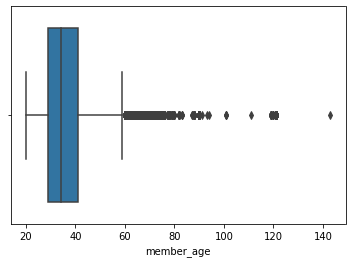

In [7]:
sb.boxplot(data=df_clean, x='member_age');
print("The mean of ages:",df_clean.member_age.mean())

In [9]:
# Only keep the data of users below or equal the age of 60
df_clean = df_clean.query('member_age <= 60')
# Save cleaned data
df_clean.to_csv('cleaned_file.csv', index=False)

## (Visualization 2)

> This visualization represents the usage of the bike system over the week days, that we can see the variety of usage between the weekdays, where that thursdays are the highest, while saturdays are the least.

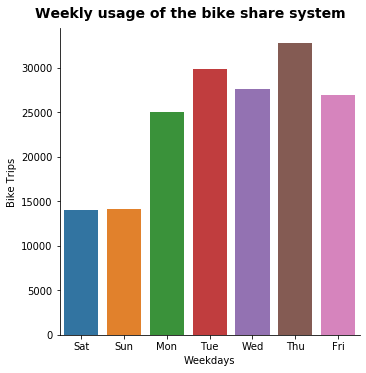

In [10]:
weekday = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
p = sb.catplot(data=df_clean, x='start_time_weekday', kind='count', order = weekday)
p.set_axis_labels("Weekdays", "Bike Trips")
p.fig.suptitle('Weekly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');



## (Visualization 3)

> This visualization represents the usage of the system over the day's hours, and we observe flom the plot that the time around 8 am and 5 pm are the highest usage times.


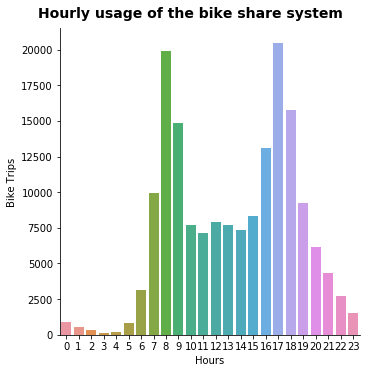

In [11]:

g = sb.catplot(data=df_clean, x='start_time_hour', kind='count')
g.set_axis_labels("Hours", "Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

## (Visualization 4)

> This visualization represents a comparison between the numbers of system users (subscribers and customers).
We can observe that the bike system is mainly used by subscribers.

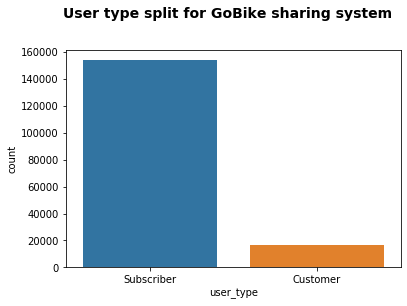

In [12]:
# Find the amount of the users who are customers and those who are subscribers
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

#normalize
n = df_clean['bike_id'].count()
ncustomer = customer / n
nsubscriber = subscriber / n

# Plot for comparison 
p = sb.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');


## (Visualization 5)

> This visualization represents a comparison between the numbers of system users (subscribers and customers) during the weekdays.
We can observe that the bike system is almost used equally throughout the week by customers, while it varies for the subscribers, where its used the most week days and least on weekends.

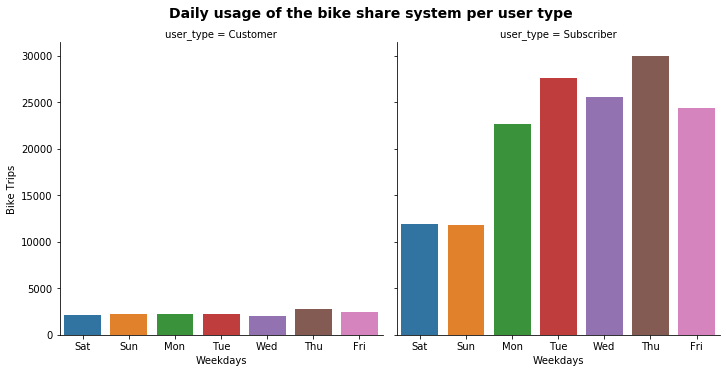

In [13]:
# Explore the usage of each user category in the weekdays
weekday = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
p = sb.catplot(data=df_clean, x='start_time_weekday', col='user_type', kind='count', order = weekday)
p.set_axis_labels("Weekdays", "Bike Trips")
p.fig.suptitle('Daily usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');


## (Visualization 6)

> This plot represents the hourly usage of customers and subscribers throughout the day, and we can see that they almost follow the same pattern.

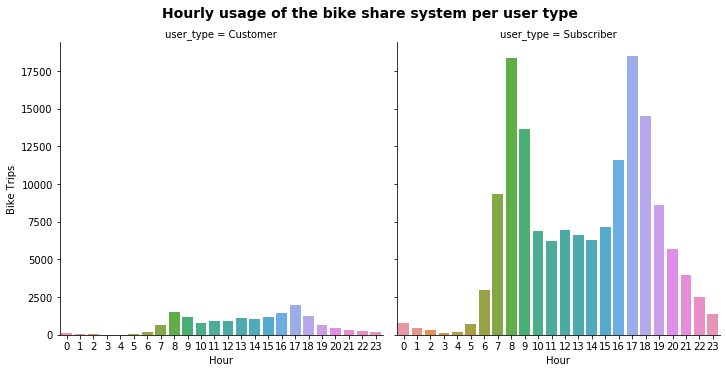

In [14]:
# Hourly usage for both user categories
p = sb.catplot(data=df_clean, x='start_time_hour', col='user_type', kind='count')
p.set_axis_labels("Hour", "Bike Trips")
p.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');



## (Visualization 7)

> From this box plot we can observe that the customers trips durations are longer than subscribers.

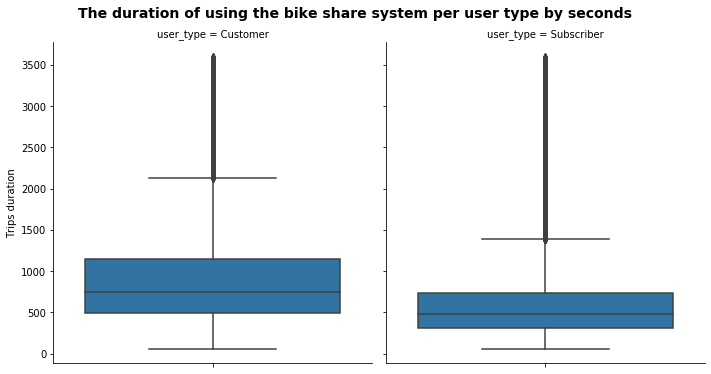

In [15]:
# first we remove the duration_sec outliers by the limit  of an hour 60x60
d = df_clean.query('duration_sec < 3600')
p = sb.catplot(data=d, y='duration_sec', col='user_type', kind='box')
p.set_axis_labels("", "Trips duration")
p.fig.suptitle('The duration of using the bike share system per user type by seconds', y=1.03, fontsize=14, fontweight='semibold');

## (Visualization 8)

> This visualization represents the count of each gender in each user type, and we can observe that men are more in both categories.

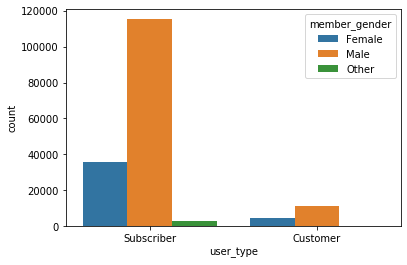

In [16]:
# Plot the gender difference in each user category
p = sb.countplot(data=df_clean, x='user_type', hue='member_gender', order=df_clean.user_type.value_counts().index)


## (Visualization 9)

> This visualization represents the amont of bikes trips done by each gender over the weekdays in each user type, and we can observe that males are more in both users categories, they are following the same pattern through out the week days.

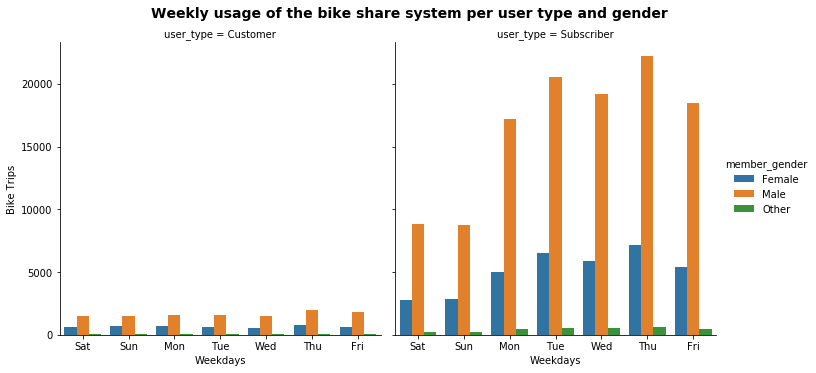

In [17]:
# Explore the usage by gender for each user category in the weekdays
weekday = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
p = sb.catplot(data=df_clean, x='start_time_weekday', col='user_type', hue='member_gender', kind='count', order = weekday)
p.set_axis_labels("Weekdays", "Bike Trips")
p.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

## (Visualization 10)

> This visualization represents the amont of bikes trips done by each gender over the daily hours in each user type, and we can observe that males are more in both users categories, they are following the same pattern through out the week days.

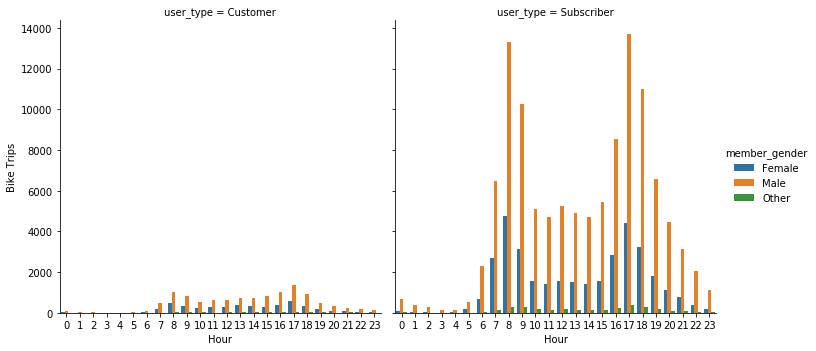

In [18]:
# Hourly usage by gender for both users categories
p = sb.catplot(data=df_clean, x='start_time_hour', col='user_type', hue='member_gender', kind='count')
p.set_axis_labels("Hour", "Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

## (Visualization 11)

> This visualization represents the trips duration done by each gender over the daily hours in each user type, and we can observe that females take longer durations in their bike rides than men for both user types cases.

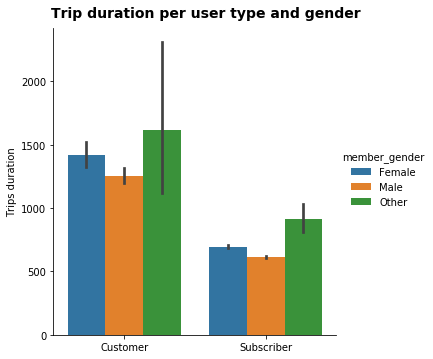

In [19]:
# Usage duration for both genders per user category
p = sb.catplot(data=df_clean ,x='user_type', y='duration_sec', hue='member_gender', kind='bar')
p.set_axis_labels("", "Trips duration")
p.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!